In [1]:
!pip install requests
!pip install beautifulsoup4 # Convert to html dom
!pip install lxml # parsing to one step to another step 
!pip install pandas
!pip install seaborn
!pip install matplotlib

You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
url = 'https://www.worldometers.info/coronavirus/'

In [3]:
import requests

In [4]:
content = requests.get(url).content

In [5]:
type(content)

bytes

In [7]:
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(content, 'html.parser')


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon
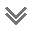

In [9]:
soup

In [10]:
tbody = soup.find('tbody')

In [11]:
table_row = tbody.find_all('tr')

In [13]:
table_row[8]

<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
<td style="font-weight: bold; text-align:right">105,972,038</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="font-weight: bold; text-align:right;">1,151,642                                </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right">103,587,178</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="text-align:right;font-weight:bold;">1,233,218</td>
<td style="font-weight: bold; text-align:right">2,247</td>
<td style="font-weight: bold; text-align:right">316,518</td>
<td style="font-weight: bold; text-align:right">3,440</td>
<td style="font-weight: bold; text-align:right">1,171,196,261</td>
<td style="font-weight: bold; text-align:right">3,4

In [14]:
all_country_data = list()
for i in range(8, len(table_row)):
    country = []
    country_data_row = table_row[i].find_all('td')
    for tag in country_data_row:
        country.append(tag.text)
    all_country_data.append(country)

In [16]:
all_country_data[1]

['2',
 'India',
 '44,695,420',
 '',
 '530,802                                ',
 '',
 '44,158,703',
 '',
 '5,915',
 'N/A',
 '31,775',
 '377',
 '920,111,661',
 '654,124',
 '1,406,631,776 ',
 'Asia',
 '31',
 '2,650',
 '2',
 '',
 '',
 '4']

In [17]:
data = list(map(lambda x: x[1:7], all_country_data))

In [18]:
data

[['USA',
  '105,972,038',
  '',
  '1,151,642                                ',
  '',
  '103,587,178'],
 ['India',
  '44,695,420',
  '',
  '530,802                                ',
  '',
  '44,158,703'],
 ['France',
  '39,703,279',
  '',
  '165,314                                ',
  '',
  '39,451,266'],
 ['Germany',
  '38,297,037',
  '',
  '169,661                                ',
  '',
  '37,936,100'],
 ['Brazil',
  '37,145,514',
  '',
  '699,634                                ',
  '',
  '36,249,161'],
 ['Japan',
  '33,374,303',
  '',
  '73,511                                ',
  '',
  '21,709,584'],
 ['S. Korea',
  '30,702,960',
  '+3,930',
  '34,171                                ',
  '+9',
  '30,499,411'],
 ['Italy',
  '25,651,205',
  '',
  '188,750                                ',
  '',
  '25,320,467'],
 ['UK',
  '24,423,396',
  '',
  '208,458                                ',
  '',
  '24,158,042'],
 ['Russia',
  '22,506,199',
  '',
  '396,834                                ',


In [19]:
import pandas as pd

In [20]:
df = pd.DataFrame(data)

In [21]:
df.head()

,0,1,2,3,4,5
0,USA,"105,972,038",,"1,151,642",,"103,587,178"
1,India,"44,695,420",,"530,802",,"44,158,703"
2,France,"39,703,279",,"165,314",,"39,451,266"
3,Germany,"38,297,037",,"169,661",,"37,936,100"
4,Brazil,"37,145,514",,"699,634",,"36,249,161"


In [22]:
columns = ['Country', 'Total Cases', 'New Cases', 'Total deaths', 'New Deaths', 'Total Recovered']

In [23]:
df.columns = columns

In [24]:
df.head()

,Country,Total Cases,New Cases,Total deaths,New Deaths,Total Recovered
0,USA,"105,972,038",,"1,151,642",,"103,587,178"
1,India,"44,695,420",,"530,802",,"44,158,703"
2,France,"39,703,279",,"165,314",,"39,451,266"
3,Germany,"38,297,037",,"169,661",,"37,936,100"
4,Brazil,"37,145,514",,"699,634",,"36,249,161"


In [25]:
df.head(7)

,Country,Total Cases,New Cases,Total deaths,New Deaths,Total Recovered
0,USA,"105,972,038",,"1,151,642",,"103,587,178"
1,India,"44,695,420",,"530,802",,"44,158,703"
2,France,"39,703,279",,"165,314",,"39,451,266"
3,Germany,"38,297,037",,"169,661",,"37,936,100"
4,Brazil,"37,145,514",,"699,634",,"36,249,161"
5,Japan,"33,374,303",,"73,511",,"21,709,584"
6,S. Korea,"30,702,960","+3,930","34,171",+9,"30,499,411"


In [26]:
df.to_csv('covid-mar-20.csv', index = False) # converting dataFrame to csv file

In [34]:
 # read csv file in dataframe
df = pd.read_csv('covid-mar-20.csv', na_values = ['', ' ','  '])
#df = pd.read_csv('covid-mar-20.csv')

In [32]:
df.head()

,Country,Total Cases,New Cases,Total deaths,New Deaths,Total Recovered
0,USA,"105,972,038",NaN,"1,151,642",NaN,"103,587,178"
1,India,"44,695,420",NaN,"530,802",NaN,"44,158,703"
2,France,"39,703,279",NaN,"165,314",NaN,"39,451,266"
3,Germany,"38,297,037",NaN,"169,661",NaN,"37,936,100"
4,Brazil,"37,145,514",NaN,"699,634",NaN,"36,249,161"


In [33]:
df.tail()

,Country,Total Cases,New Cases,Total deaths,New Deaths,Total Recovered
226,Vatican City,29,NaN,NaN,NaN,29
227,Western Sahara,10,NaN,1,NaN,9
228,MS Zaandam,9,NaN,2,NaN,7
229,Tokelau,5,NaN,NaN,NaN,NaN
230,China,"503,302",NaN,"5,272",NaN,"379,053"


# NaN is Missing Values


In [36]:
df.shape # 231 Rows and 6 Columns

(231, 6)

In [38]:
df.isna() # find missing values

,Country,Total Cases,New Cases,Total deaths,New Deaths,Total Recovered
0,False,False,True,False,True,False
1,False,False,True,False,True,False
2,False,False,True,False,True,False
3,False,False,True,False,True,False
4,False,False,True,False,True,False
...,...,...,...,...,...,...
226,False,False,True,True,True,False
227,False,False,True,False,True,False
228,False,False,True,False,True,False
229,False,False,True,True,True,True


In [40]:
df.isna().sum() # how many missing rows in each column

Country              0
Total Cases          0
New Cases          230
Total deaths         6
New Deaths         230
Total Recovered     21
dtype: int64

<Axes: >

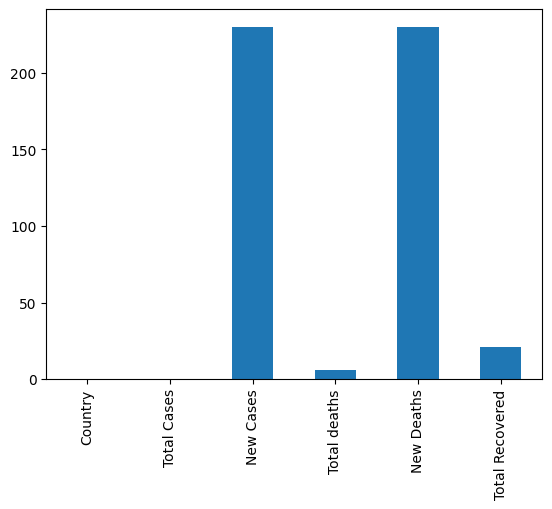

In [43]:
df.isna().sum().plot.bar()

<Axes: >

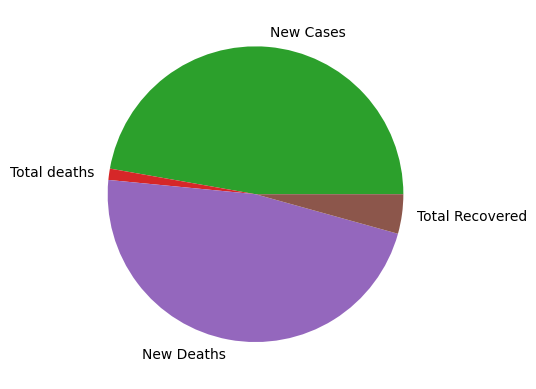

In [44]:
df.isna().sum().plot.pie()

In [45]:
import seaborn as sns

<Axes: >

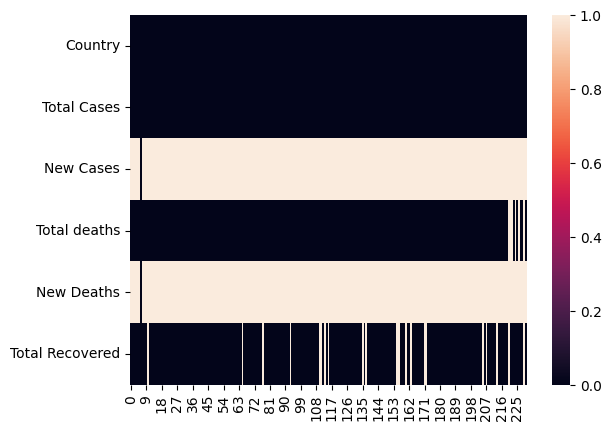

In [46]:
sns.heatmap(df.isna().transpose())

In [47]:
df.isna().transpose()

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
Country,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Total Cases,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
New Cases,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Total deaths,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,True,False,False,True,False
New Deaths,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Total Recovered,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [48]:
df[df['Country'] == 'Nepal']

,Country,Total Cases,New Cases,Total deaths,New Deaths,Total Recovered
72,Nepal,"1,001,182",NaN,"12,020",NaN,"989,145"


In [49]:
df[df['Country'] == 'China']

,Country,Total Cases,New Cases,Total deaths,New Deaths,Total Recovered
230,China,"503,302",NaN,"5,272",NaN,"379,053"
